# Market Analysis through Web Scraping

Project description

Mobile Phone Analysis on E-commerce Sites: Use libraries such as BeautifulSoup or Scrapy to collect data on mobile phones from platforms like Amazon or eBay, including details such as price, ratings, and specifications.

Step 1: Install Necessary Libraries

In [1]:
# Install the necessary libraries
# %pip install requests
# %pip install pandas
# %pip install selenium

Step 2: Set Up WebDriver

In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import matplotlib.pyplot as plt

Step 3: Configure WebDriver

In [3]:
# Set up the Chrome WebDriver (Make sure to have ChromeDriver installed)
driver = webdriver.Chrome()  # Specify the path if necessary

Step 4: Define Target URL and Open Page

In [4]:
# Define the URL and open it in a browser
url = 'https://www.ebay.com/sch/i.html?_nkw=mobile+phones'
driver.get(url)

# Allow the page to load fully
time.sleep(3)  # Adjust this delay if needed


Step 5: Initialize lists to store scraped data

In [5]:
product_names = []
product_prices = []

Step 6: Scrape product names and prices

In [6]:
try:
    # Step 5: Scrape product names and prices
    products = driver.find_elements(By.CLASS_NAME, 's-item__title')
    prices = driver.find_elements(By.CLASS_NAME, 's-item__price')

    # Loop to collect product names and prices
    for product, price in zip(products, prices):
        product_names.append(product.text)
        product_prices.append(price.text.replace('$', '').replace(',', ''))  # Clean price format for analysis

finally:
    driver.quit()  # Close the browser session

Step 7: Convert data to a DataFrame for analysis

In [7]:
df = pd.DataFrame({'Product Name': product_names, 'Price': product_prices})

Step 8: Handle data type conversion for prices

In [11]:

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Display the first few rows of the dataset
print(df.head())

                                        Product Name  Price
0                                                       NaN
1                                                       NaN
2  Apple iPhone 13 128 256 GB Black Pink Blue Red...    NaN
3  Apple iPhone 12 Pro|12|11 Pro|11|XR|XS|8-64GB/...    NaN
4  Unlocked 7.3" S24 Ultra 5G Smartphone Android ...    NaN


Step 9: Visualize the data

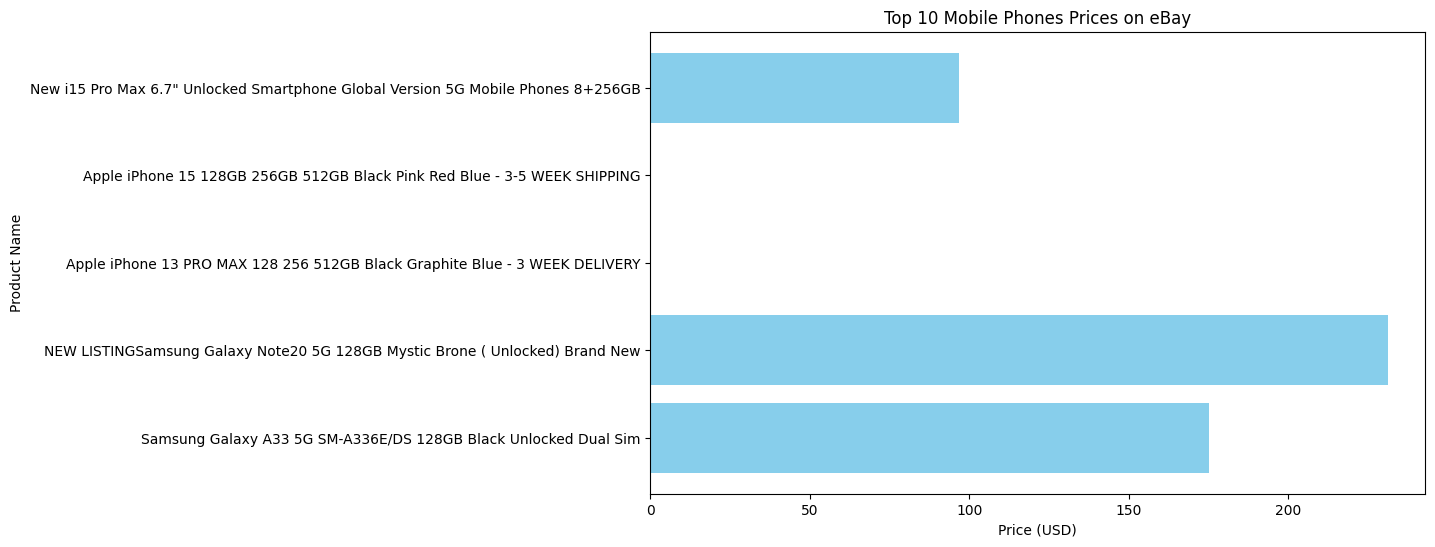

In [13]:
# Here, we'll use a bar plot to display product prices for the first 10 products
df_subset = df.head(10)  # Limit to top 10 products for readability in the plot

plt.figure(figsize=(10, 6))
plt.barh(df_subset['Product Name'], df_subset['Price'], color='skyblue')
plt.xlabel('Price (USD)')
plt.ylabel('Product Name')
plt.title('Top 10 Mobile Phones Prices on eBay')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### Project Description:
This project performs web scraping on the eBay website to analyze the market for mobile phones. By extracting information on product names and prices, the goal is to create a dataset that can be used for pricing trends, comparisons, and further analysis in the mobile phone market. This process involves:

Setting up a Selenium WebDriver to load and parse the website.
Extracting product names and prices from the listings on the eBay search page.
Storing the scraped data in a structured format (Pandas DataFrame).
Visualizing the collected data for an initial exploratory analysis.

### Results:
After scraping the data from eBay, we collected a dataset of mobile phones with the following fields:

Product Name: The title of each mobile phone listing as displayed on eBay.
Price: The price in USD for each phone, formatted to be used for further analysis.
In the visualization, we presented a bar chart of the top 10 mobile phones by price, showing:

Variation in Price: Initial insights into pricing differences across listings.
Availability of Affordable and Premium Options: A look into which phones are priced lower or higher, allowing for insights into potential consumer affordability and market trends.

